In [1]:
import sqlite3
import pandas as pd
from timeit import default_timer as timer

#abstracts_db_name = 'plos_cb_abstracts_3years'
abstracts_db_name = 'plos_cb_abstracts_throughSeptember2018'
db_path = 'data/' + abstracts_db_name + '.db'

# connect to the database
db = sqlite3.connect(db_path)
print('database connected')

# cursor method
#cursor = db.cursor()
#cursor.execute("SELECT * FROM plos_cb_abstracts")

# since there are ~ 5,000 entries, just read directly into a pandas dataframe
df = pd.read_sql_query("select * from {}".format(abstracts_db_name), db)
df



database connected


,id,url,authors,date,title,abstract,author_summary
0,None,https://doi.org/10.1371/journal.pcbi.1005973,"\n Runmin Wei, Jingy...","January 31, 2018",\nGSimp: A Gibbs sampler based left-censored m...,Left-censored missing values commonly exist in...,\nMissing values caused by the limit of detect...
1,None,https://doi.org/10.1371/journal.pcbi.1005931,"\n Krzysztof Bartoszek, ...","January 31, 2018",\nPredicting pathogenicity behavior in Escheri...,The Binary State Speciation and Extinction (Bi...,\nAn important challenge in Computational Biol...
2,None,https://doi.org/10.1371/journal.pcbi.1005953,"\n Yonathan Murin, J...","January 30, 2018",\nSozRank: A new approach for localizing the e...,Epilepsy is one of the most common neurologica...,\nEpilepsy is a common neurological disorder c...
3,None,https://doi.org/10.1371/journal.pcbi.1005949,"\n Francesco Alessandro Massucci,...","January 30, 2018",\nMetabolic plasticity in synthetic lethal mut...,The most frequent form of pairwise synthetic l...,"\nSynthetic lethality (SL), in which the combi..."
4,None,https://doi.org/10.1371/journal.pcbi.1005968,"\n Antonio Fabregat, ...","January 29, 2018",\nReactome graph database: Efficient access to...,"Reactome is a free, open-source, open-data, cu...","\nTo better support genome analysis, modeling,..."
5,None,https://doi.org/10.1371/journal.pcbi.1005951,"\n Alon Diament, Ann...","January 29, 2018",\nThe extent of ribosome queuing in budding ye...,Ribosome queuing is a fundamental phenomenon s...,"\nDuring translation, multiple ribosomes may t..."
6,None,https://doi.org/10.1371/journal.pcbi.1005943,"\n Rahila Rahimova, ...","January 29, 2018",\nIdentification of allosteric inhibitors of t...,The ecto-5’-nucleotidase CD73 plays an importa...,\nNucleotidases play a central role in maintai...
7,None,https://doi.org/10.1371/journal.pcbi.1005930,"\n Pablo Martínez-Cañada, ...","January 29, 2018",\nBiophysical network modeling of the dLGN cir...,Despite half-a-century of research since the s...,\nThe functional role of the dorsal lateral ge...
8,None,https://doi.org/10.1371/journal.pcbi.1005944,"\n Guillaume Marçais, ...","January 26, 2018",\nMUMmer4: A fast and versatile genome alignme...,The MUMmer system and the genome sequence alig...,No author summary found
9,None,https://doi.org/10.1371/journal.pcbi.1005952,"\n Koich Saeki, Akir...","January 25, 2018",\nThe role of spatial heterogeneity in the evo...,"Viruses have two modes spread in a host body, ...",\nViruses such as human immunodeficiency virus...


In [3]:
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import string

def clean_text(paragraph,the_stopwords):
    
    clean_words = []
    words = paragraph.split()
    
    for word in words:
        
        word = word.lower()
        
        # pick off any leading punctuation or trailing punctuation
        finished_checking_prefix = False
        while not(finished_checking_prefix):
            try:
                this_char = word[0]
                if this_char in string.punctuation:
                    word = word[1:] # snip leading punctuation
                else:
                    finished_checking_prefix = True
            except:
                # no more characters to check
                finished_checking_prefix = True
        
        finished_checking_postfix = False
        while not(finished_checking_postfix):
            try:
                this_char = word[-1]
                if this_char in string.punctuation:
                    word = word[:-1] # snip trailing punctuation
                else:
                    finished_checking_postfix = True
            except:
                # no more characters to check
                finished_checking_postfix = True
        
        # could split on slashes to handle this case: e.g. structure/function...but first need to check for url structure
        #word = " ".join(word.split('/'))
        
        if not(word in the_stopwords):
            clean_words.append(word)

    # or, better, use textblob Word lemmatize
    clean_paragraph = " ".join(clean_words)
    
    # remove stop words

    
    return clean_paragraph # return paragraph with words separated by spaces and no generic punctuation

In [5]:
# update dataframe with cleaned text

the_stopwords = set(stopwords.words('english'))
print(the_stopwords)

df['abstract_clean'] = ""
for idx,abstract in enumerate(df['abstract']):
    df['abstract_clean'].iloc[idx] = clean_text(abstract,the_stopwords) # norm the text
    
df['author_summary_clean'] = ""  # note - currently not using this
for idx,summary in enumerate(df['author_summary']):
    df['author_summary_clean'].iloc[idx] = clean_text(summary,the_stopwords) # norm the text

df    

{'but', 'themselves', 'ourselves', 'no', 'should', 'whom', 'both', 'yourselves', 'that', 'when', 'do', 'only', 'being', 'what', 'd', 'don', 'him', 'is', 'which', 'their', 'hasn', 'further', 'herself', 'her', 'himself', 'few', 'very', 'his', 'ain', 'have', 'own', 'my', 'who', 's', 'ours', 'shouldn', 'having', 'shan', 'your', 'under', 'on', 'in', 'here', 'o', 'up', 'most', 'll', 'until', 'them', 'there', 'then', 'about', 'yourself', 'any', 'we', 'why', 'before', 'just', 'am', 'to', 'into', 'too', 'above', 'as', 'with', 'y', 'wouldn', 'had', 'if', 'doesn', 'been', 're', 'was', 'below', 'doing', 'our', 'more', 'wasn', 'from', 'myself', 'he', 'or', 'has', 'couldn', 'didn', 'all', 've', 'ma', 'these', 'after', 'each', 'than', 'weren', 'did', 'and', 'again', 'once', 'this', 'other', 'how', 'not', 'same', 'hers', 'were', 'mightn', 'yours', 'between', 'won', 'of', 'out', 'are', 'against', 'now', 'm', 'where', 'a', 'me', 'hadn', 'through', 't', 'isn', 'down', 'can', 'you', 'it', 'for', 'i', 'its

,id,url,authors,date,title,abstract,author_summary,abstract_clean,author_summary_clean
0,None,https://doi.org/10.1371/journal.pcbi.1005973,"\n Runmin Wei, Jingy...","January 31, 2018",\nGSimp: A Gibbs sampler based left-censored m...,Left-censored missing values commonly exist in...,\nMissing values caused by the limit of detect...,left-censored missing values commonly exist ta...,missing values caused limit detection/quantifi...
1,None,https://doi.org/10.1371/journal.pcbi.1005931,"\n Krzysztof Bartoszek, ...","January 31, 2018",\nPredicting pathogenicity behavior in Escheri...,The Binary State Speciation and Extinction (Bi...,\nAn important challenge in Computational Biol...,binary state speciation extinction bisse model...,important challenge computational biology anal...
2,None,https://doi.org/10.1371/journal.pcbi.1005953,"\n Yonathan Murin, J...","January 30, 2018",\nSozRank: A new approach for localizing the e...,Epilepsy is one of the most common neurologica...,\nEpilepsy is a common neurological disorder c...,epilepsy one common neurological disorders aff...,epilepsy common neurological disorder characte...
3,None,https://doi.org/10.1371/journal.pcbi.1005949,"\n Francesco Alessandro Massucci,...","January 30, 2018",\nMetabolic plasticity in synthetic lethal mut...,The most frequent form of pairwise synthetic l...,"\nSynthetic lethality (SL), in which the combi...",frequent form pairwise synthetic lethality sl ...,synthetic lethality sl combined knockout two n...
4,None,https://doi.org/10.1371/journal.pcbi.1005968,"\n Antonio Fabregat, ...","January 29, 2018",\nReactome graph database: Efficient access to...,"Reactome is a free, open-source, open-data, cu...","\nTo better support genome analysis, modeling,...",reactome free open-source open-data curated pe...,better support genome analysis modeling system...
5,None,https://doi.org/10.1371/journal.pcbi.1005951,"\n Alon Diament, Ann...","January 29, 2018",\nThe extent of ribosome queuing in budding ye...,Ribosome queuing is a fundamental phenomenon s...,"\nDuring translation, multiple ribosomes may t...",ribosome queuing fundamental phenomenon sugges...,translation multiple ribosomes may translate m...
6,None,https://doi.org/10.1371/journal.pcbi.1005943,"\n Rahila Rahimova, ...","January 29, 2018",\nIdentification of allosteric inhibitors of t...,The ecto-5’-nucleotidase CD73 plays an importa...,\nNucleotidases play a central role in maintai...,ecto-5’-nucleotidase cd73 plays important role...,nucleotidases play central role maintaining nu...
7,None,https://doi.org/10.1371/journal.pcbi.1005930,"\n Pablo Martínez-Cañada, ...","January 29, 2018",\nBiophysical network modeling of the dLGN cir...,Despite half-a-century of research since the s...,\nThe functional role of the dorsal lateral ge...,despite half-a-century research since seminal ...,functional role dorsal lateral geniculate nucl...
8,None,https://doi.org/10.1371/journal.pcbi.1005944,"\n Guillaume Marçais, ...","January 26, 2018",\nMUMmer4: A fast and versatile genome alignme...,The MUMmer system and the genome sequence alig...,No author summary found,mummer system genome sequence aligner nucmer i...,author summary found
9,None,https://doi.org/10.1371/journal.pcbi.1005952,"\n Koich Saeki, Akir...","January 25, 2018",\nThe role of spatial heterogeneity in the evo...,"Viruses have two modes spread in a host body, ...",\nViruses such as human immunodeficiency virus...,viruses two modes spread host body one release...,viruses human immunodeficiency virus measles v...


In [6]:
from collections import defaultdict
import numpy as np

# todo generate word count
abstract_dictionary = defaultdict(lambda: 0)

# get all the words from the abstracts    # ###  (and author summaries
for idx,abstract in enumerate(df['abstract_clean']):
    #author_summary = df['author_summary_clean'].iloc[idx]
    for word in abstract.split(' '):
        abstract_dictionary[word] += 1
    #for word in author_summary.split(' '):
    #    dictionary[word] += 1

# get word statistics:
# number of words
numWords = np.sum(list(abstract_dictionary.values()))
print("num words:")
print(numWords)
# number of unique words
numUniqueWords = len(list(abstract_dictionary.keys()))
print(numUniqueWords)

common_word_idxs = np.argwhere(np.asarray(list(abstract_dictionary.values())) >= 20)[:,0]
print(common_word_idxs)
num_common_words = np.shape(common_word_idxs)[0]
print('num common words: ' + str(num_common_words))
key_list = list(abstract_dictionary.keys())
common_words = [key_list[idx] for idx in common_word_idxs]
dictionary_common_words = {}
for word in common_words:
    dictionary_common_words[word] = abstract_dictionary[word]
# just the words used by word2vec
print(dictionary_common_words)


# snapshot of percentiles in the word frequency distribution
'''
print(np.min(dictionary.values()))
print(np.percentile(dictionary.values(),25))
print(np.percentile(dictionary.values(),50))
print(np.percentile(dictionary.values(),75))
print(np.percentile(dictionary.values(),90))
print(np.percentile(dictionary.values(),95))
print(np.percentile(dictionary.values(),99))
print(np.max(dictionary.values()))


# histogram of word frequency
import matplotlib.pyplot as plt
plt.figure()
plt.hist(dictionary.values(), 100)
plt.title('historam of word occurrences is very long tailed')
plt.xlim([0, 100000])
plt.show()

'''


num words:
767598
41790
[    1     2     3 ... 28381 28552 29137]
num common words: 4764
{'missing': 76, 'values': 304, 'commonly': 155, 'exist': 141, 'targeted': 134, 'metabolomics': 30, 'datasets': 433, 'considered': 222, 'random': 410, 'data': 3907, 'processing': 375, 'procedures': 30, 'cause': 182, 'adverse': 39, 'impacts': 56, 'subsequent': 123, 'statistical': 569, 'analyses': 394, 'however': 1617, 'imputation': 21, 'methods': 1341, 'developed': 929, 'applied': 680, 'situation': 33, 'field': 351, 'thus': 916, 'practical': 73, 'value': 239, 'method': 1653, 'needed': 147, 'iterative': 46, 'based': 1677, 'approach': 1689, 'compared': 580, 'three': 722, 'two': 2037, 'real-world': 28, 'one': 1401, 'simulation': 539, 'dataset': 216, 'using': 2795, 'evaluation': 103, 'pipeline': 100, 'results': 2409, 'show': 2384, 'outperforms': 84, 'terms': 317, 'accuracy': 489, 'observation': 130, 'distribution': 643, 'multivariate': 58, 'sensitivity': 371, 'additionally': 156, 'parallel': 152, 'versio

"\nprint(np.min(dictionary.values()))\nprint(np.percentile(dictionary.values(),25))\nprint(np.percentile(dictionary.values(),50))\nprint(np.percentile(dictionary.values(),75))\nprint(np.percentile(dictionary.values(),90))\nprint(np.percentile(dictionary.values(),95))\nprint(np.percentile(dictionary.values(),99))\nprint(np.max(dictionary.values()))\n\n\n# histogram of word frequency\nimport matplotlib.pyplot as plt\nplt.figure()\nplt.hist(dictionary.values(), 100)\nplt.title('historam of word occurrences is very long tailed')\nplt.xlim([0, 100000])\nplt.show()\n\n"

In [7]:
# data formatting for word2vec

print('generating sentences data structure...')
list_of_sentences = []
# generate the appropriate input format
for idx,abstract in enumerate(df['abstract_clean']):
    #print(df['title'].iloc[idx])
    author_summary = df['author_summary_clean'].iloc[idx]
    list_of_sentences.append(abstract.split(' '))
    #list_of_sentences.append(author_summary.split(' '))
print('sentences data structure generated')


print(list_of_sentences[3])


generating sentences data structure...
sentences data structure generated
['frequent', 'form', 'pairwise', 'synthetic', 'lethality', 'sl', 'metabolic', 'networks', 'known', 'plasticity', 'synthetic', 'lethality', 'occurs', 'simultaneous', 'inhibition', 'paired', 'functional', 'silent', 'metabolic', 'reactions', 'genes', 'lethal', 'default', 'functional', 'partner', 'backed', 'activation', 'silent', 'one', 'using', 'computational', 'techniques', 'bacterial', 'genome-scale', 'metabolic', 'reconstructions', 'found', 'failure', 'functional', 'partner', 'triggers', 'critical', 'reorganization', 'fluxes', 'ensure', 'viability', 'mutant', 'affects', 'sl', 'pair', 'significant', 'fraction', 'interconnected', 'reactions', 'forming', 'call', 'sl', 'cluster', 'interestingly', 'sl', 'clusters', 'show', 'strong', 'entanglement', 'terms', 'reactions', 'genes', 'strong', 'overlap', 'mitigates', 'acquired', 'vulnerabilities', 'increased', 'structural', 'functional', 'costs', 'pay', 'robustness', 'prov

In [21]:
# word embeddings with word2vec
from gensim.models import Word2Vec


MIN_COUNT = 20 # don't consider words that occur fewer than 20 times

start = timer()

DIM = 100;
model = Word2Vec(sentences=list_of_sentences, # tokenized senteces, list of list of strings
                 size=DIM,  # size of embedding vectors
                 workers=1, # how many threads?       
                 negative=20, # noise words to draw for negative sampling  
                 window=50, # words to look back
                 min_count=MIN_COUNT, # minimum frequency per token, filtering rare words
                 sample=0.005, # weight of downsampling common words
                 sg = 1, # should we use skip-gram? if 0, then cbow
                 iter=100,
                 hs = 0) # hierarchical softmax training or 0 for negative sampling training

end = timer()
print("time elapsed: ")
print(end - start)

time elapsed: 
13153.010170471505


64
-0.37391679316759113
0.8790390837192532


C:\Users\Brendan\Anaconda\envs\dimensionality_env\lib\site-packages\ipykernel\__main__.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


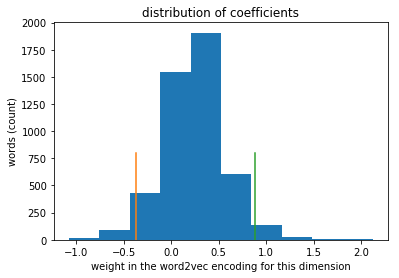

strong anti-related word examples : ['decision', 'competition', 'decisions', 'stdp', 'homeostasis', 'rule', 'glucose', 'steady', 'fate', 'reward', 'resonance', 'iron', 'metabolite', 'sleep', 'web', 'reinforcement', 'homeostatic', 'bistability', 'carbon', 'dopamine', 'storage', 'oscillators', 'contexts', 'red', 'nutrient', 'vesicle', 'switches', 'food', 'stationary', 'pool', 'analytically', 'memories', 'extinction', 'compartments', 'operating', 'stored', 'mating', 'codons', 'mixing', 'hebbian', 'symmetric', 'grow', 'biomass', 'art', 'nutrients', 'regardless', 'positives', 'adding', 'attractors', 'seconds', 'top-down', 'homologs', 'abnormal', 'contextual', 'favored', 'post-synaptic', 'striatal', 'ranking', 'calls', 'operon', 'ros', 'conditioning', 'commitment', 'paralogs', 'utilization', 'bold', 'striatum', 'astrocytes', 'moment', 'stoichiometric', 'supply', 'zebrafish', 'grn', 'confounding', 'addresses', 'reprogramming', 'constituent', 'irreversible', 'cooperators', 'notch', 'metabolomi

C:\Users\Brendan\Anaconda\envs\dimensionality_env\lib\site-packages\ipykernel\__main__.py:39: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
C:\Users\Brendan\Anaconda\envs\dimensionality_env\lib\site-packages\ipykernel\__main__.py:40: DeprecationWarning: Call to deprecated `syn1neg` (Attribute will be removed in 4.0.0, use self.trainables.syn1neg instead).


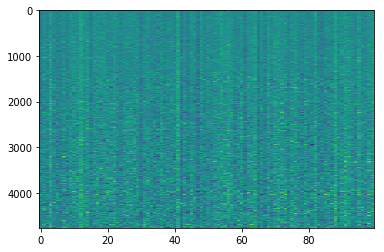

In [22]:
# visualize the word2vec weights
import matplotlib.pyplot as plt
from collections import Counter

common_words_counter = Counter(dictionary_common_words)
common_words_sorted = [my_tuple[0] for my_tuple in common_words_counter.most_common()]

word2vec_dimension_idx = np.random.randint(0,DIM-1)
print(word2vec_dimension_idx)
word2vec_dimension = np.zeros((num_common_words,1))
for idx,word in enumerate(common_words_sorted):
    word2vec_dimension[idx] = model[word][word2vec_dimension_idx] # in case the sorting order is slightly different in 'encoding weights'

# what are teh coefficients
lower_cutoff = np.percentile(word2vec_dimension, 3) # from inspection of the histogram - objective here is visualization
upper_cutoff = np.percentile(word2vec_dimension, 97)
print(np.percentile(word2vec_dimension,  3))
print(np.percentile(word2vec_dimension, 97))
plt.figure()
plt.hist(word2vec_dimension)
plt.plot([lower_cutoff, lower_cutoff],[0, 800])
plt.plot([upper_cutoff, upper_cutoff],[0, 800])
plt.title('distribution of coefficients')
plt.xlabel('weight in the word2vec encoding for this dimension')
plt.ylabel('words (count)')
plt.show()

# print words lower than cutoff
low_weight_idxs = np.argwhere(word2vec_dimension <= lower_cutoff)[:,0]
low_weight_examples = [common_words_sorted[idx] for idx in low_weight_idxs]
print('strong anti-related word examples : ' + str(low_weight_examples))

# print words higher than cutoff
high_weight_idxs = np.argwhere(word2vec_dimension >= upper_cutoff)[:,0]
high_weight_examples = [common_words_sorted[idx] for idx in high_weight_idxs]
print('strong related word examples : ' + str(high_weight_examples))


encoding_weights = model.wv.syn0
decoding_weights = model.syn1neg

plt.figure()
plt.imshow(encoding_weights,aspect='auto')
plt.show()


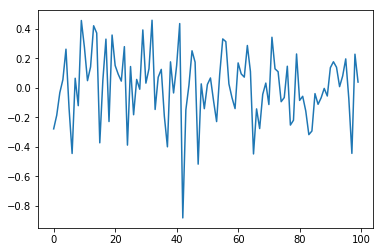

In [23]:
# save the model to a database

import matplotlib.pyplot as plt
from gensim.test.utils import get_tmpfile
from gensim.models import KeyedVectors

output_name = 'wordEmbeddings_keyedVectorObject_throughSeptember2018'

word_vectors = model.wv
fname = get_tmpfile(output_name + '.kv')
word_vectors.save(fname)

plt.figure()
plt.plot(word_vectors['experiment'])
plt.show()

In [24]:
# represent each article as a point in embedding-space
# todo - maybe the sum should happen *before* the embedding step (depends whether there's a softmax layer )
import math

abstract_embedding = np.zeros((df.shape[0],DIM)) # number of abstracts x dimensionality of the embedding
#abstract_embedding_alt = np.zeros((df.shape[0],DIM)) # sum before the embedding step (no assumption of global scale linearity in the embedded space)
#author_summary_embedding = np.zeros((df.shape[0],DIM))

# todo scale vectors by 1/total count across all documents

for idx,abstract in enumerate(df['abstract_clean']):
    v = np.zeros((1,DIM))
    for word in abstract.split(' '):
        try: 
            word_embedding = model[word]
            inverse_frequency = 1.0 / (math.log(abstract_dictionary[word],2)) # scale by log frequency
        except:
            word_embedding = np.zeros((1,DIM)) # rare words aren't in the model dictionary
            inverse_frequency = -1
        v = v + (word_embedding *inverse_frequency) # scale by log frequency ?
    abstract_embedding[idx,:] = v
    #print(np.shape(v))
 
'''
for idx,summary in enumerate(df['author_summary_clean']):
    v = np.zeros((1,DIM))
    for word in summary.split(' '):
        try: 
            word_embedding = model[word]
        except:
            word_embedding = np.zeros((1,DIM)) # rare words aren't in the model dictionary
        v = v + word_embedding
    author_summary_embedding[idx,:] = v
'''    
    
print(np.shape(abstract_embedding))
#print(np.shape(author_summary_embedding))


C:\Users\Brendan\Anaconda\envs\dimensionality_env\lib\site-packages\ipykernel\__main__.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


(5346, 100)


(20,)
(20, 100)


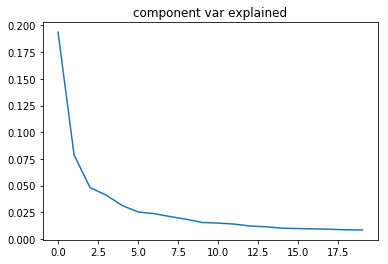

[0.1936474  0.07871453 0.04810625 0.04109188 0.03134213 0.02526187
 0.02372529 0.02093678 0.01844298 0.01542656 0.01485525 0.0138917
 0.01207252 0.01132926 0.01003475 0.00971446 0.0093818  0.00903036
 0.0085811  0.00844419]
(5346, 20)


In [25]:
# todo try pca to bring the dimensionality down
from sklearn.decomposition import PCA
import numpy as np

N_COMPONENTS = 20 # from inspection

pca = PCA(n_components=N_COMPONENTS) # 
pca.fit(abstract_embedding)

print(np.shape(pca.singular_values_))
print(np.shape(pca.components_))

plt.figure()
plt.plot(pca.explained_variance_ratio_)
plt.title('component var explained')  # only the first ~40 components are making strong contributions ( >= ~1%)
plt.show()

print(pca.explained_variance_ratio_)

abstract_embedding_pca_compression = pca.transform(abstract_embedding)
print(np.shape(abstract_embedding_pca_compression))

In [26]:
# run umap to crunch down the pca projection

import umap

abstract_embedding_pca_umap_compression = umap.UMAP(
    n_neighbors=100, # 30 is probably a good value for clustering applications
    min_dist=0.0001,
    n_components=2, # target_dimensionality
    random_state=42,
    metric='cosine'
).fit_transform(abstract_embedding_pca_compression)



11


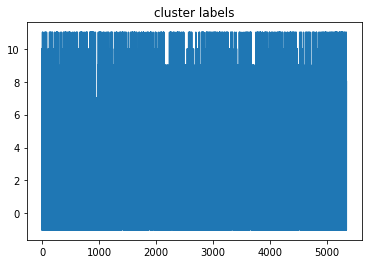

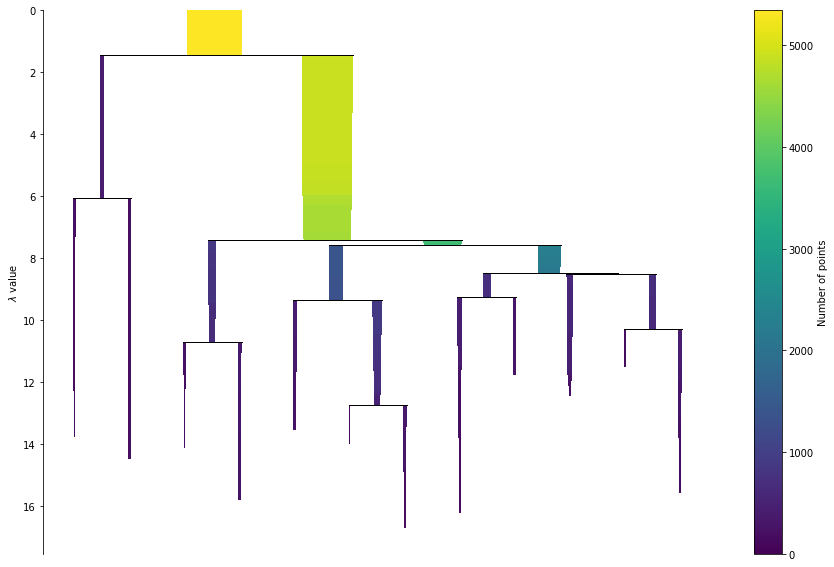

{0: 211, 1: 204, 2: 246, 3: 374, 4: 654, 5: 401, 6: 445, 7: 283, 8: 181, 9: 437, 10: 164, 11: 354, -1: 1392}


In [28]:
# try out some clustering

import hdbscan
#import seaborn as sns

# input is samples x features

clusterer = hdbscan.HDBSCAN(cluster_selection_method='leaf',min_samples=1,min_cluster_size=150) # cluster_selection_method='leaf',
labels = clusterer.fit_predict(abstract_embedding_pca_umap_compression) # realized this return was available just now

print(clusterer.labels_.max())
N_clusters = clusterer.labels_.max()
cluster_labels = clusterer.labels_.tolist()

plt.figure()
plt.plot(clusterer.labels_)
plt.title('cluster labels')
plt.show()

plt.figure(figsize=(15,10))
clusterer.condensed_tree_.plot() #select_clusters=True,
                               # selection_palette=sns.color_palette('deep', 8))
plt.show()

cluster_sizes = dict((x,cluster_labels.count(x)) for x in set(cluster_labels))
print(cluster_sizes)

finished umap compression
(5346, 2)


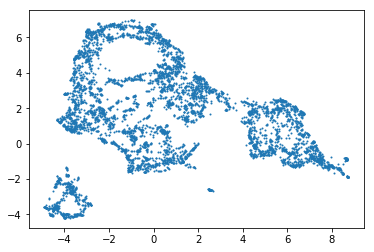

(5346,)
clabels
[False  True False ... False  True  True]


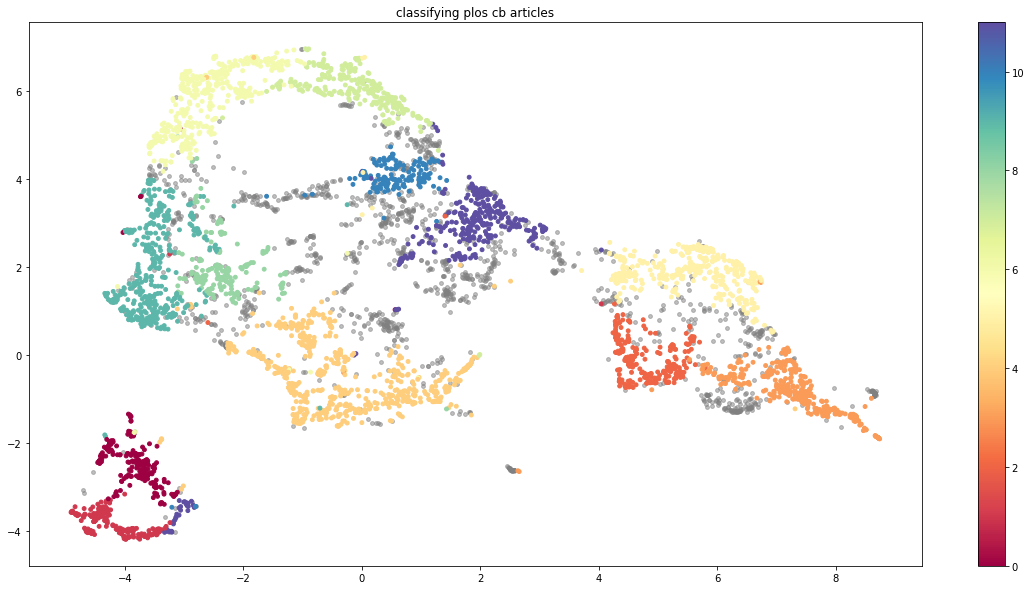

In [29]:
# try a quick viz

import umap

abstract_embedding_viz_compression = umap.UMAP(
    n_neighbors=10, # 15 is probably a good value for viz applications
    min_dist=0.01,
    n_components=2, # target_dimensionality
    random_state=42,
    metric='cosine'
).fit_transform(abstract_embedding_pca_compression)

print('finished umap compression')
print(np.shape(abstract_embedding_viz_compression))

plt.figure()
plt.scatter(abstract_embedding_viz_compression[:,0],abstract_embedding_viz_compression[:,1],
           s=1)
plt.show()

print(np.shape(cluster_labels))


plt.figure(figsize=(20,10))
c_labels = (labels >= 0) # non - null
print('clabels')
print(c_labels)
plt.scatter(abstract_embedding_viz_compression[~c_labels, 0],
            abstract_embedding_viz_compression[~c_labels, 1],
            c=(0.5, 0.5, 0.5),
            s=15,
            alpha=0.5)
plt.scatter(abstract_embedding_viz_compression[c_labels, 0],
            abstract_embedding_viz_compression[c_labels, 1],
            c=labels[c_labels],
            s=15,
            cmap='Spectral');
plt.colorbar()
plt.title('classifying plos cb articles')
plt.savefig('ploscb_clustering_overview.svg')
plt.show()



In [31]:
# save the visualization as a json file for use with d3

import json

list_of_points = []
for idx,point in enumerate(abstract_embedding_viz_compression):
    x_pos = float(point[0])
    y_pos = float(point[1])
    title = df['title'].iloc[idx]
    clusterID = int(labels[idx])
    point_object = {"x":x_pos,"y":y_pos,"clusterID":clusterID,"title":title}
    list_of_points.append(point_object)   
#print(list_of_points)

save_path = "data/ploscb_embedded_clusters_update.json"

with open(save_path, 'w') as outfile:  
    json.dump(list_of_points, outfile)
    
print('saved to json file')


saved to json file


2.0


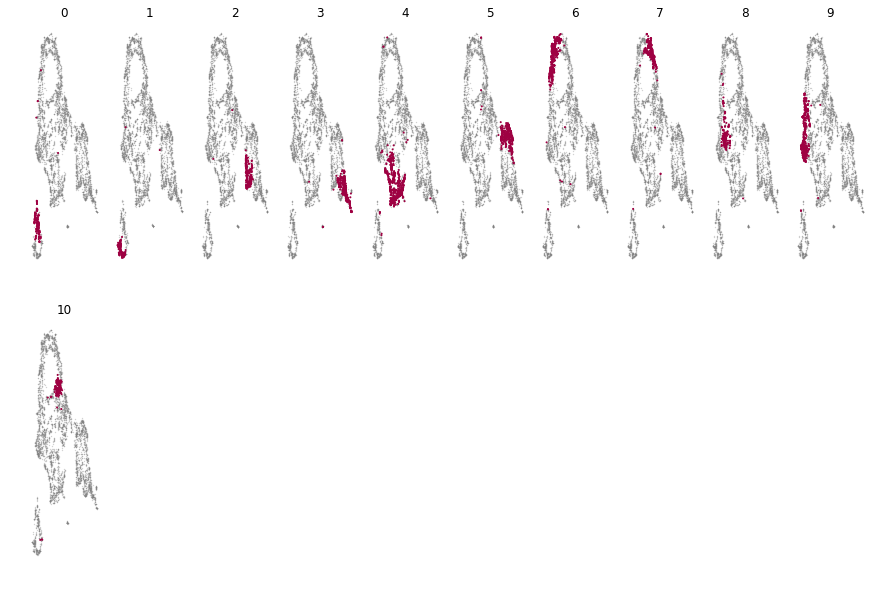

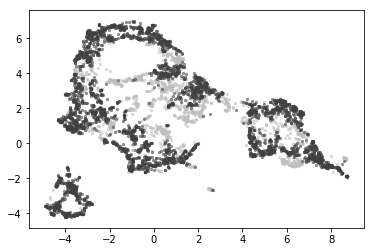

In [30]:
# plot each cluster individually

panels_per_row = 10
N_rows = np.ceil( (N_clusters+1) / panels_per_row) # extra panel for showing null cluster
print(N_rows)
plt.figure(figsize=(15,10))
for idx in range(N_clusters):
    plt.subplot(N_rows, panels_per_row, idx+1)
    
    c_labels = (labels == idx)
    plt.scatter(abstract_embedding_viz_compression[~c_labels, 0],
            abstract_embedding_viz_compression[~c_labels, 1],
            c=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
    plt.scatter(abstract_embedding_viz_compression[c_labels, 0],
                abstract_embedding_viz_compression[c_labels, 1],
                c=labels[c_labels],
                s=1,
                cmap='Spectral');
    
    plt.axis('off')
    plt.title(idx)

plt.show()

plt.figure()
c_labels = (labels == -1)
plt.scatter(abstract_embedding_viz_compression[c_labels, 0],
            abstract_embedding_viz_compression[c_labels, 1],
            c=(0.75, 0.75, 0.75),
            s=5,
            alpha=0.5)
plt.scatter(abstract_embedding_viz_compression[~c_labels, 0],
            abstract_embedding_viz_compression[~c_labels, 1],
            c=(0.25,0.25,0.25),
            s=5,
            alpha=0.5) # plot these 
plt.show()

In [91]:
for cluster_idx in range(N_clusters):
    print('articles for cluster ' + str(cluster_idx) + ':')
    
    # list the articles
    source_idxs = np.argwhere(labels==cluster_idx)[:,0] # flatten
    print(source_idxs)
    
    cluster_texts = []
    for source_idx in source_idxs:
        cluster_texts.append(list_of_sentences[source_idx])
    #print(cluster_texts)
    
    cluster_titles = []
    for source_idx in source_idxs:
        cluster_titles.append(df['title'].iloc[source_idx])
    print(cluster_titles)
    
    print(' ')
    print(' ')

articles for cluster 0:
[  90  124  146  168  214  310  315  353  355  431  446  475  505  563
  763  817  843  882  883  961  989 1009 1102 1107 1123 1130 1135 1187
 1188 1362 1542 1676 1677 1698 1712 1725 1731 1768 1790 1816 1817 1986
 2009 2029 2049 2075 2079 2097 2186 2194 2232 2282 2295 2378 2394 2396
 2415 2456 2459 2480 2499]
['\nSARNAclust: Semi-automatic detection of RNA protein binding motifs from immunoprecipitation data            ', '\nStoichiometric balance of protein copy numbers is measurable and functionally significant in a protein-protein interaction network for yeast endocytosis            ', '\nRosettaAntibodyDesign (RAbD): A general framework for computational antibody design            ', '\nBiogeography and environmental conditions shape bacteriophage-bacteria networks across the human microbiome            ', '\nAtomic resolution mechanism of ligand binding to a solvent inaccessible cavity in T4 lysozyme            ', '\nSubgraphs of functional brain networks i

[   4   62  121  151  159  175  223  231  238  277  363  380  384  445
  470  503  516  583  584  585  623  624  649  671  675  726  748  756
  785  793  828  862  866  878  917  924  988 1076 1078 1111 1112 1115
 1140 1168 1201 1219 1253 1283 1397 1424 1448 1489 1559 1670 1820 1903
 1936 2015 2096 2104 2105 2106 2125 2130 2138 2249 2275 2284 2296 2330
 2387 2476 2503]
['\nReactome graph database: Efficient access to complex pathway data            ', '\nIntegrating linear optimization with structural modeling to increase HIV neutralization breadth            ', '\n4Cin: A computational pipeline for 3D genome modeling and virtual Hi-C analyses from 4C data            ', '\nRIDDLE: Race and ethnicity Imputation from Disease history with Deep LEarning            ', '\nA machine learning based framework to identify and classify long terminal repeat retrotransposons            ', '\nUsing pseudoalignment and base quality to accurately quantify microbial community composition            ', 

cluster index = 4
7 14 35 73 76 117 122 148 195 206 217 221 229 234 236 241 249 257 296 306 319 323 326 334 340 360 373 410 413 419 424 474 505 549 564 572 618 619 622 654 662 667 673 683 742 775 780 803 804 813 814 818 852 854 859 885 910 914 931 939 972 984 1037 1065 1067 1099 1137 1138 1140 1193 1197 1200 1202 1256 1270 1281 1286 1352 1391 1405 1413 1418 1444 1489 1490 1507 1525 1535 1538 1554 1583 1604 1608 1659 1677 1681 1683 1688 1740 1757 1783 1791 1797 1798 1837 1842 1856 1910 1924 1928 1943 1957 1983 1994 2016 2036 2042 2063 2065 2077 2086 2087 2093 2146 2164 2175 2207 2216 2222 2229 2238 2243 2244 2251 2293 2323 2334 2339 2396 2403 2404 2457 2468 2470 2473 2504 2532 2540 2562 2569 2583 2595 2635 2639 2644 2654 2677 2695 2730 2735 2763 2769 2870 2872 2929 2970 2974 2996 3015 3028 3102 3113 3116 3121 3123 3136 3164 3178 3199 3208 3234 3245 3249 3256 3281 3293 3304 3313 3331 3333 3359 3374 3376 3385 3395 3414 3420 3443 3449 3458 3482 3486 3495 3511 3529 3559 3563 3592 3599 3642 

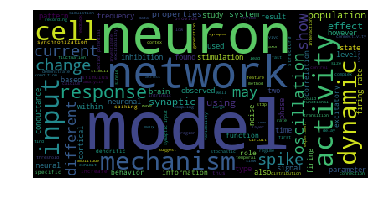

"\nwordcloud = WordCloud(\n                          background_color='black',\n                          max_words=200,\n                          max_font_size=40, \n                          random_state=42\n                         ).generate(str(data['title']))\n"

In [16]:
# compare some cluster members (sanity check / figure out how to do better feature selection)
import random
from wordcloud import WordCloud


def generate_wordcloud(text): # optionally add: stopwords=STOPWORDS and change the arg below
    wordcloud = WordCloud(background_color='black', # font_path='/Library/Fonts/Verdana.ttf',
                          relative_scaling = 1.0,
                          stopwords = {'to', 'of'} # set or space-separated string
                          ).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

    
    
    
cluster_idx = 4 #  random.randint(0,N_clusters-1)
print("cluster index = " + str(cluster_idx))

source_idxs = np.argwhere(labels==cluster_idx)[:,0] # flatten

# words from abstract
cluster_texts = []
merged_string = ''
for source_idx in source_idxs:
    cluster_texts.append(list_of_sentences[source_idx])
    
    this_string = ' '.join(list_of_sentences[source_idx])
    merged_string = ' '.join([merged_string, this_string])
#print(*cluster_texts,sep='\n')
#print(merged_string) # generate this for convenience

# cluster indices
source_idxs = np.argwhere(labels==cluster_idx)[:,0] # flatten
print(*source_idxs)

# titles
cluster_titles = []
for source_idx in source_idxs:
    cluster_titles.append(df['title'].iloc[source_idx])
print(*cluster_titles,sep='\n')

############################################################
# draw word cloud for overall cluster text
# print a few examples from the cluster

# unique words in the database x presence in each abstract
generate_wordcloud(merged_string)
'''
wordcloud = WordCloud(
                          background_color='black',
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(data['title']))
'''

